In [1]:
import tensorflow as tf
from keras.utils import plot_model
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

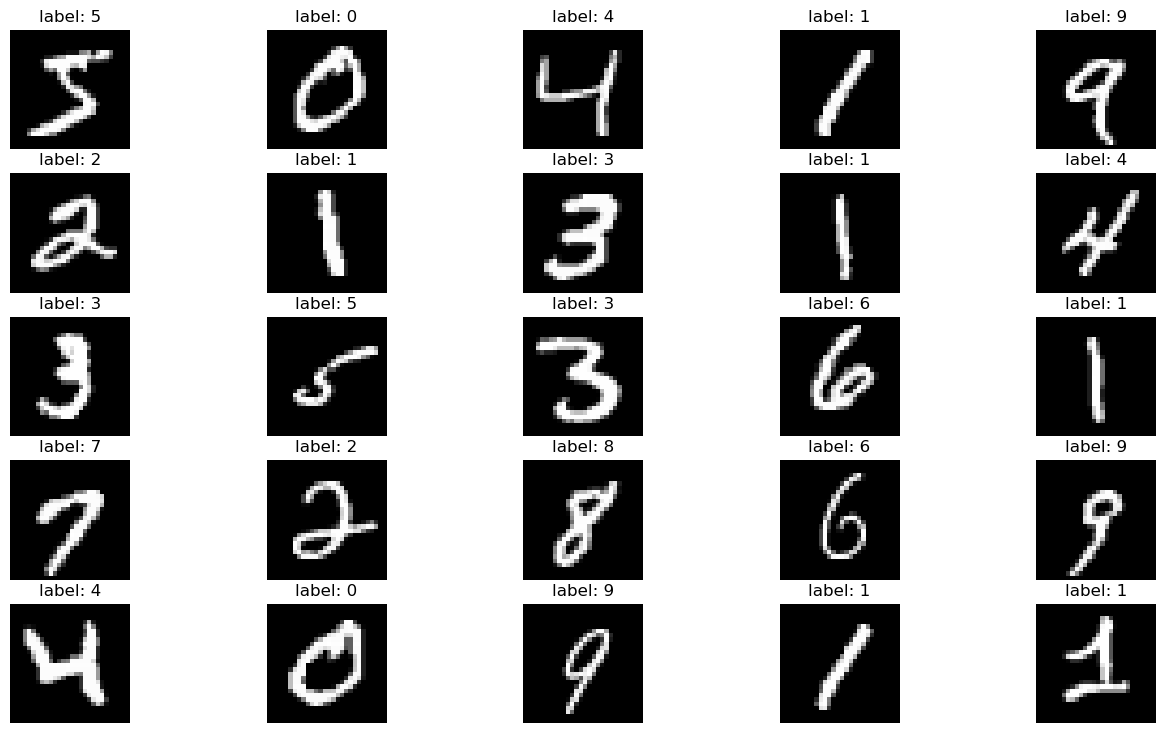

In [4]:
plt.figure(figsize=(16,9))
for i in range(1,26):
        plt.subplot(5,5,i)
        plt.title(f'label: {y_train[i-1]}')
        plt.imshow(x_train[i-1], cmap='gray')
        plt.axis('off')

In [5]:
x_train[2].shape

(28, 28)

In [6]:
# NORMALISE

x_train = x_train / 255
x_test = x_test / 255

### One hot encode y using to_categorical

In [7]:
from keras.utils import to_categorical

y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [8]:
import cv2

In [9]:
new_char = cv2.imread('../input/images/new-char1.jpg', 0) # read in grayscale
new_char = cv2.resize(new_char, dsize=(28, 28)) # resize to 28 * 28
thresh, new_char = cv2.threshold(new_char, 127, 255, cv2.THRESH_BINARY_INV) # invert

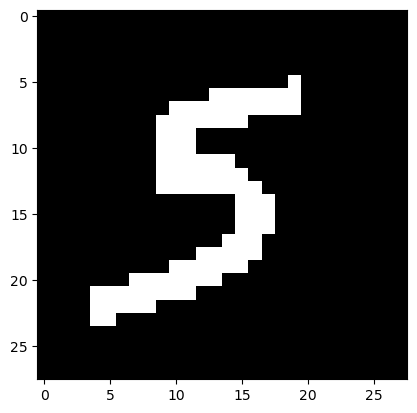

In [10]:

plt.imshow(new_char, cmap='gray')

In [11]:
new_char = new_char.reshape(1, 784) # reshape to match model input

In [12]:
# res = np.argmax(model.predict(new_char, verbose=False))
# res

CNN

In [13]:
model = tf.keras.Sequential()

model.add(tf.keras.Input(shape=(28, 28, 1)))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,426 (829.79 KB)

 Trainable params: 212,426 (829.79 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [16]:
hist = model.fit(x_train, y_train_new, validation_data=(x_test, y_test_new), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9583 - loss: 0.1390 - val_accuracy: 0.9839 - val_loss: 0.0486
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9852 - loss: 0.0461 - val_accuracy: 0.9901 - val_loss: 0.0307
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9905 - loss: 0.0298 - val_accuracy: 0.9899 - val_loss: 0.0317
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9934 - loss: 0.0211 - val_accuracy: 0.9861 - val_loss: 0.0458
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9946 - loss: 0.0166 - val_accuracy: 0.9872 - val_loss: 0.0420
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9917 - val_loss: 0.0301
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9965 - loss: 0.0103 - val_accuracy: 0.9915 - val_loss: 0.0335
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9967 - loss: 0

In [17]:
model.evaluate(x_test, y_test_new, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9920 - loss: 0.0333


[0.03329308331012726, 0.9919999837875366]

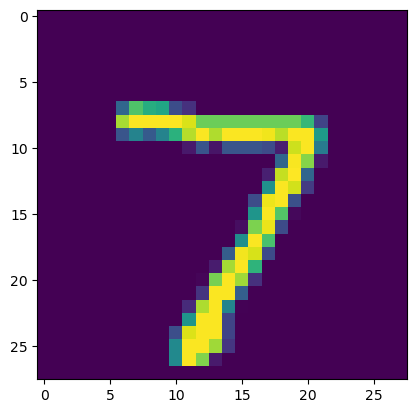

In [18]:
plt.imshow(x_test[0])

In [19]:
new = x_test[0].reshape(1, 28, 28)


In [20]:
result = model.predict(new, verbose=False)
print(np.argmax(result))

7
